In [ ]:
# Hypothesis Testing
# 4: Over time, the gender distribution in teams of authors became more equal

In [1]:
# >>> Preparation
import pandas

In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown',
]

publs = pandas.read_csv("data/publications_cor2.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [3]:
# >>> Create Correlation Matrix
publs_cor = publs.corr(method='spearman')

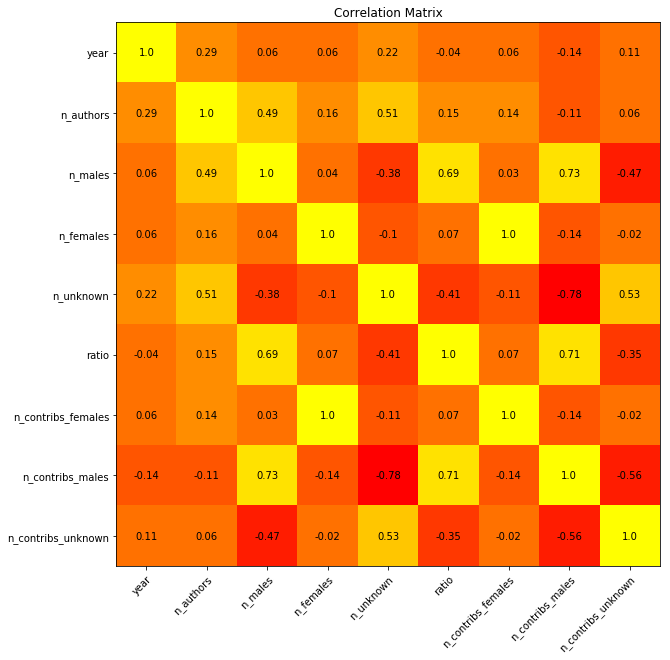

In [5]:
# >>> Visualization
# visualize correlation matrix https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# annotated https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

autumn = cm.get_cmap('autumn', 10)

#https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(publs_cor, cmap=autumn)

plt.xticks(np.arange(len(publs_cor.columns.values)), publs_cor.columns.values, rotation='vertical')
plt.yticks(np.arange(len(publs_cor.columns.values)), publs_cor.columns.values)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(publs_cor.columns.values)):
    for j in range(len(publs_cor.columns.values)):
        # round https://www.tutorialspoint.com/python/number_round.htm
        text = ax.text(j, i, round(publs_cor.iloc[i, j], 2), ha="center", va="center", color="k")

plt.title("Correlation Matrix")

plt.show()
# We already see that the year does not seem to correlate with the gender equality index ("ratio")

In [6]:
publs_by_year_group = publs.groupby("year")

In [7]:
publs_sum_by_year = publs_by_year_group.count()

In [8]:
valid_publs_sum_by_year = publs_sum_by_year[publs_sum_by_year['key'] > 1000] #minimum sample size
valid_publs_sum_by_year = valid_publs_sum_by_year[valid_publs_sum_by_year.index < 2019]
# 1966 is the first valid year
# 2019 is not valid because we have only the first 4 months of it in the db

In [ ]:
plt.scatter(publs['year'], publs['ratio'], alpha=0.1, color="g", label="Equality Index [-50%, 50%]")

plt.xlabel("Year")
plt.ylabel("Equality Index (%)")

plt.title("How did Gender Equality change over time?")
plt.legend()
plt.show()

In [ ]:
publs['ratio'].hist()

In [ ]:
ratio_mean_by_year = publs_by_year_group.agg({'ratio':'mean'})

In [ ]:
valid_ratio_mean_by_year = ratio_mean_by_year[(ratio_mean_by_year.index > 1965) & (ratio_mean_by_year.index < 2019)]

In [ ]:
#https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Equality Index', color='b')
ax1.plot(valid_ratio_mean_by_year.index.values, valid_ratio_mean_by_year['ratio'].values, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# set y limits for a subplot: https://stackoverflow.com/questions/15858192/how-to-set-xlim-and-ylim-for-a-subplot-in-matplotlib
ax1.set_ylim([0,50])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Publications', color='r')  # we already handled the x-label with ax1
ax2.plot(valid_publs_sum_by_year.index.values, valid_publs_sum_by_year['key'].values, color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()